In [64]:
import helpers
import numpy as np

#helpers.npNicePrint(arr)

data = """FF7FSF7F7F7F7F7F---7
L|LJ||||||||||||F--J
FL-7LJLJ||||||LJL-77
F--JF--7||LJLJ7F7FJ-
L---JF-JLJ.||-FJLJJ7
|F|F-JF---7F7-L7L|7|
|FFJF7L7F-JF7|JL---7
7-L-JL7||F7|L7F-7F7|
L.L7LFJ|||||FJL7||LJ
L7JLJL-JLJLJL--JLJ.L"""
with open("input_10.txt", 'r') as f:
    data = f.read().strip()

grid = {(x,y): val for y, r in enumerate(data.split('\n')) for x, val in enumerate(r)}

start_coord = np.array([k for k,v in grid.items() if v == "S"][0])
grid, start_coord

({(0, 0): 'F',
  (1, 0): '-',
  (2, 0): 'L',
  (3, 0): '-',
  (4, 0): '-',
  (5, 0): '-',
  (6, 0): '-',
  (7, 0): 'F',
  (8, 0): '7',
  (9, 0): '-',
  (10, 0): '7',
  (11, 0): '.',
  (12, 0): 'F',
  (13, 0): '-',
  (14, 0): '7',
  (15, 0): 'J',
  (16, 0): 'J',
  (17, 0): '.',
  (18, 0): 'F',
  (19, 0): '-',
  (20, 0): '-',
  (21, 0): 'L',
  (22, 0): '-',
  (23, 0): '.',
  (24, 0): 'F',
  (25, 0): '|',
  (26, 0): 'F',
  (27, 0): '7',
  (28, 0): '7',
  (29, 0): '.',
  (30, 0): 'L',
  (31, 0): '|',
  (32, 0): '7',
  (33, 0): '.',
  (34, 0): 'F',
  (35, 0): 'L',
  (36, 0): 'F',
  (37, 0): '-',
  (38, 0): '7',
  (39, 0): '.',
  (40, 0): 'J',
  (41, 0): 'J',
  (42, 0): '-',
  (43, 0): '-',
  (44, 0): '7',
  (45, 0): 'F',
  (46, 0): 'F',
  (47, 0): '-',
  (48, 0): 'F',
  (49, 0): '-',
  (50, 0): 'F',
  (51, 0): '7',
  (52, 0): 'F',
  (53, 0): '7',
  (54, 0): '.',
  (55, 0): '7',
  (56, 0): '-',
  (57, 0): 'F',
  (58, 0): '-',
  (59, 0): '7',
  (60, 0): '.',
  (61, 0): 'L',
  (62, 0): '.',
  

In [65]:
directions = {"N": np.array((0,-1)), "S": np.array((0, 1)), "W": np.array((-1, 0)), "E": np.array((1,0))}

movements = {"|": {"S": "S", "N": "N"},
             "-": {"E": "E", "W": "W"},
             "L": {"S": "E", "W": "N"},
             "J": {"S": "W", "E": "N"},
             "7": {"N": "W", "E": "S"},
             "F": {"N": "E", "W": "S"}
            }

In [66]:
from collections import deque

coord = start_coord
coords = deque([(start_coord, direction, 0) for direction in ["S"]])
loop_coords = []
loop_coords.append(tuple(coord))
while not len(coords) == 0:
    coord,direction,num = coords.popleft()
    coord = coord + directions[direction]
    loop_coords.append(tuple(coord))
    if tuple(coord) not in grid.keys():
        print("invalid coordinate")
        continue
    tile = grid[tuple(coord)]
    if tile == "S":
        print("S found")
        #print(coord, num+1)
        print(f"answer: {(num+1) / 2}")
        break
    if tile == ".":
        print("ground")
        continue
    direction = movements[tile].get(direction)
    if not direction:
        print("invalid pipe")
        continue
    #print(coord, tile, direction)
    coords.append((coord, direction, num+1))
    
polygon = Polygon(list(loop_coords))

coords_positions = {coord: Point(*coord).within(polygon) for coord,v in grid.items() if not coord in loop_coords}

ans = len([k for k,v in coords_positions.items() if v])
ans

S found
answer: 6701.0


303

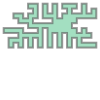

In [61]:
polygon

In [62]:
coords_positions

{(10, 4): True, (1, 8): False, (18, 9): False}

In [13]:
def is_point_inside_polygon(x, y, polygon):
    n = len(polygon)
    inside = False

    # Create horizontal ray from the point
    x1, y1 = x, y
    x2, y2 = max(polygon, key=lambda p: p[0])[0] + 1, y

    for i in range(n):
        x3, y3 = polygon[i]
        x4, y4 = polygon[(i + 1) % n]

        # Check for intersection between the ray and the polygon edge
        if ((y3 > y) != (y4 > y)) and (x < (x4 - x3) * (y - y3) / (y4 - y3) + x3):
            inside = not inside

    return inside

# Example usage:
polygon = [(1, 1), (4, 1), (4, 4), (1, 4)]

point_inside = is_point_inside_polygon(2, 2, loop_coords)
print(f"Is (2, 2) inside the polygon? {point_inside}")

point_outside = is_point_inside_polygon(5, 5, polygon)
print(f"Is (5, 5) inside the polygon? {point_outside}")

Is (2, 2) inside the polygon? True
Is (5, 5) inside the polygon? False


In [ ]:
"""...........
.S-------7.
.|F-----7|.
.||.....||.
.||.....||.
.|L-7.F-J|.
.|..|.|..|.
.L--J.L--J.
..........."""

In [22]:
point_inside = is_point_inside_polygon(3, 3, list(loop_coords))
print(f"Is (2, 2) inside the polygon? {point_inside}")

Is (2, 2) inside the polygon? True


In [26]:
from shapely.geometry import Point, Polygon

def is_point_inside_polygon(coord, polygon_coords):
    point = Point(*coord)
    #polygon = Polygon(polygon_coords)
    return point.within(polygon)

In [30]:
#[coord for coord,v in grid.items() if v == "."]
polygon =  Polygon(polygon_coords)

#point.within(polygon)

NameError: name 'polygon_coords' is not defined

4

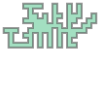

In [56]:
Polygon(list(loop_coords))

#polygon

In [36]:

Point(*coord).within(polygon)

False